# **Deep Learning for Text and Sequences**

**What is NLP (Natural Language Processing)?**

NLP falls under the domain of AI which involves working with natural languages to perform various tasks like **Language Translation**, **Speech Recoginition** (Translate spoken language into text by computers), **Spam Classification** and **many more**. 

We have divided this notebook into two main sections:

1. In this section we will give a brief introduction to basic NLP concepts using NLTK (Natual Language ToolKit)

2. In this section we will go through RNN (Recurrent Neural Network) and build a model in Keras to perform semantic ananlysis

### Part I: Introduction to basic NLP Concepts

We will be covering following concepts in this part:

1. Tokenization (Sentence and Word Tokenization)
2. Lemmatization and Stemming
3. Stop Words Removal
4. Regex


## Introduction to NLTK

Before we jump into code lets first see what is NLTK. It is an open source platform for working on human language data in python. It provides easily usable interfaces to text handling and manipulation programs like tokenization, stemming, lemmatization and many more. It has variety of corpora availabel to work with. In this tutorial we will be taking advatange these libraries to demonstrate theoritical concepts in code.

In [0]:
#Lets install NLTK first
!pip install --user -U nltk


Requirement already up-to-date: nltk in /root/.local/lib/python3.6/site-packages (3.4.4)


In [0]:
#imports
import nltk
print ('nltk package imported successfully')
nltk.download('popular') #download some particular datasets and models

nltk package imported successfully


[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Package cmudict is already up-to-date!
[nltk_data]    | Downloading package gazetteers to /root/nltk_data...
[nltk_data]    |   Package gazetteers is already up-to-date!
[nltk_data]    | Downloading package genesis to /root/nltk_data...
[nltk_data]    |   Package genesis is already up-to-date!
[nltk_data]    | Downloading package gutenberg to /root/nltk_data...
[nltk_data]    |   Package gutenberg is already up-to-date!
[nltk_data]    | Downloading package inaugural to /root/nltk_data...
[nltk_data]    |   Package inaugural is already up-to-date!
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package movie_reviews is already up-to-date!
[nltk_data]    | Downloading package names to /root/nltk_data...
[nltk_data]    |   Package names is already up-to-date!
[nltk_data]    | Do

True

## Tokenization

Tokenization is process of splitting string of language into sentences and words. This splitting is done by seperating tokens (sentences and words) on the basis of punctuations. For example, sentences are split using periods and words by using blank spaces. However it is a very simple way of defining of tokenization as this is not always true for other languages.

In [0]:
#Example for tokenization
paragraph = 'Representation learning has been a well known study in the computational intelligence space for years but its '\
+ 'importance has taken off lately with the birth of deep learning. While conventional computational intelligence techniques '\
+ 'such as classification often look at mathematically well-formed datasets, deep learning models look at data such as images '\
+ 'that have not well-structured features. In that sense, representation learning is a an important feature of most deep learning architectures.'

print ('Paragraph : ' , paragraph)

Paragraph :  Representation learning has been a well known study in the computational intelligence space for years but its importance has taken off lately with the birth of deep learning. While conventional computational intelligence techniques such as classification often look at mathematically well-formed datasets, deep learning models look at data such as images that have not well-structured features. In that sense, representation learning is a an important feature of most deep learning architectures.


In [0]:
#Tokenize the paragraph into sentences
sentences = nltk.sent_tokenize(paragraph)

#Lets see the sentences
for sentence in enumerate (sentences):
  print (sentence)

(0, 'Representation learning has been a well known study in the computational intelligence space for years but its importance has taken off lately with the birth of deep learning.')
(1, 'While conventional computational intelligence techniques such as classification often look at mathematically well-formed datasets, deep learning models look at data such as images that have not well-structured features.')
(2, 'In that sense, representation learning is a an important feature of most deep learning architectures.')


**sent_tokenize (text, language='english')**
1. Params - This built in nltk function takes two params: text - the string to be tokenized and language - language of the string to be tokenized which is by default set to English
2. Working - This function uses an unsupervised algorithm to create sentences considering a whole lot of factors like: words used at the start of the sentences, sentence boundaries, abberivation words, and collocations.
3. Return - returns a list of tokenized sentences from the text

In [0]:
#Now lets tokenize sentences into words
for sentence in sentences:
  words = nltk.word_tokenize(sentence) #calls the function to tokenize sentence into words
  print (len(words)) #lets just print length and not all the words to avoid clutter

29
30
17


**word_tokenize(text, language='english', preserve_line=False)**
1. Params - This built in nltk function takes three params: text - the string to be tokenized, language - language of the string to be tokenized which is by default set to English, and preserve_line - flag to tokenize the text into sentences before word tokenizing it. It is false by default.
2. Working - This function uses regular expressions to tokenize the text. Roughly, it standardizes the contractions, treats most punctuation token as seperators, and filter periods seperate that appear at the end of the sentencce
3. Return - returns a list of tokenized words from the text

## Lemmatization and Stemming

Lemmatization and Stemming are used to reduce set of derived words to a common base word. 

For example: dog, dogs, dog's, dogs' should all be reduced to one common form **dog** 

Stemming does this by chopping off the beginning or end of words to remove affixes (prefixes and suffixes). driving is converted to drive

Lemmatization does the similiar thing by reducing words to their dictionary form. For example words like best, excellent are changed to good as a standard, past, future, and continous forms of tenses are resolved to single standard form. 

In [0]:
#Lets see the code
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.corpus import wordnet #for providing part of speech to Lemmatizer

lemmatizer = WordNetLemmatizer()
stemmer = PorterStemmer()

print ('Stemmer for word drawing : ', stemmer.stem('drawing'))
print ('Stemmer for word drove : ', stemmer.stem('drove'))
       
print ('Lemmatizer for word drove : ', lemmatizer.lemmatize('drove', wordnet.VERB))
print ('Lemmatizer for word drove : ', lemmatizer.lemmatize('drawing', wordnet.VERB))

Stemmer for word drawing :  draw
Stemmer for word drove :  drove
Lemmatizer for word drove :  drive
Lemmatizer for word drove :  draw


**stemmer.stem(token)**

1- Params - This function takes one param: token - the token to be stemmed

2- Working - This function performs common stemming functionality like removing prefixes and suffixes, converting feminine to masculine form, and convert plural form to its singular form

3- Return: return the stemmed token

**lemmatizer.lemmatize(word, pos)**

1- Params - This function takes two params: word - the word to be converted to base form and pos - it tells about the part of speech to which the word belongs

2- Working - This function performs a set of morphological operations to find the base word for the passed word in wordnet (one of the corpora available in nltk) database

3- Return: return the lemmatized word

## Stop Words Removal

Stop words are the words that most commonly used and do not add much of semantic meaning to the text therefore we filter out these words before applying algorithms to remove noise. Some common stop words include **we**, **a**, **you** 

In [0]:
#lets see the collection of stopwords in nltk
from nltk.corpus import stopwords #import stopwords from nltk corpus
print(stopwords.words("english")) #Stopwords in English Language

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [0]:
#lets see how our paragraph looks like without stopwords
stop_words = stopwords.words("english")
words = nltk.word_tokenize(paragraph)
for word in words:
  if not word in stop_words:
    print (word, sep=' ' , end=' ')

Representation learning well known study computational intelligence space years importance taken lately birth deep learning . While conventional computational intelligence techniques classification often look mathematically well-formed datasets , deep learning models look data images well-structured features . In sense , representation learning important feature deep learning architectures . 

## Regex

Regex (Regular Expression) is a sequence of characters that defines a search pattern or in simpler words it is a method for a programmer to tell the program what patterns to look for and what actions to take once those patterns are found in the text. Regex is a very widely used to technique to cleanse data with particular type of noise. 

In [0]:
#lets see how to apply a simple regex in python
import re

result = re.sub("\ ", "_", paragraph) #replace blank space with '_' in the paragraph 
print(result) 

Representation_learning_has_been_a_well_known_study_in_the_computational_intelligence_space_for_years_but_its_importance_has_taken_off_lately_with_the_birth_of_deep_learning._While_conventional_computational_intelligence_techniques_such_as_classification_often_look_at_mathematically_well-formed_datasets,_deep_learning_models_look_at_data_such_as_images_that_have_not_well-structured_features._In_that_sense,_representation_learning_is_a_an_important_feature_of_most_deep_learning_architectures.


**re.sub (pattern, repl, string, count=0)**

1- Params - This function takes four params: pattern - the pattern that is to replace, repl - replacement for the pattern, string - string that is to replaced and count for the maximum number of occurences are to replaced 

2- Working: Returns a updated string and if no matching pattern is found then the unchanged string

3- Updated string after replacements (if pattern is found)

### Part II: Building RNN to Classify Sentimets

In this section we will go through a basic definition of RNN (Recurrent neural network), LSTM (Long Short-term Memory) Network and build a classifier with LSTM layer in Keras to classify sentiments.

**So, What is a RNN?**

RNNs are artificial neural networks that unlike other ANNs (Artificial Neural Networks) remember history from previous steps. They contain a hidden layer which is responsible for maintaining this history. These networks are particularly useful when dealing with time series data, text sequences or sound data.

However, RNNs are not particularly useful in solving problems that require remembering long term sequences due to **vanishing gradients** problem. A variation of RNNs known as LSTM is used which contains a memory cell along with a gating mechanism to decide entry and exit for memory with the cell.

## Word Embeddings

Before we jump into code lets first discuss about word embeddings. Word embeddings is a way of representing text such that the words with similiar contexts have smaller distance as compared to words with different meanings. For example, words like good, best will lie closer to each other in the coodinate system. 

Two famous word embedding models are:

1. Word2Vec
2. Glove

In [0]:
import numpy as np #for LA operations
import pandas as pd #for data manipulation
import os #for os related functions

#Imports from keras and tokenizer API 
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import LSTM
from keras.layers.embeddings import Embedding
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence



Using TensorFlow backend.


## Model Building and Training 

Now we are all set to build our model. We will be building models one with an LSTM layer and another with Conv1D layer.  We will be using preloaded dataset for LSTM network whereas for CNN we will be using manually downloaded dataset. Both the datasets are same but we wanted to give an idea how can we do it in two different ways.

## Dataset loading

First we will be using keras preloaded dataset of **Large movie review dataset** to give you an overview of how to use built in datasets in Keras

**Dataset** - Large Movie Dataset provides 25000 movie reviews for training and same number of reviews for the training. Where each review has either a positive (**representated as 1**) or negative (**representated as 0**) sentiment.

**max_words** -  shows the maximum length of a review if any review is greater than that we will turncate it and zero pad the smaller ones

**top_words** - defines how many top words to load from the dataset and zero out the words other than those top 5000

In [0]:
from keras.datasets import imdb #we will be using preloaded dataset for LSTM and manually prepared for Conv

#Lets first build LSTM with using imdb API for the dataset
# fix random seed for reproducibility
seed = 7
np.random.seed(seed)

np_load_old = np.load

# modify the default parameters of np.load
np.load = lambda *a,**k: np_load_old(*a, allow_pickle=True, **k)


max_words = 500
top_words = 5000
EMBEDDING_DIM = 100

(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=top_words)

np.load = np_load_old #revert back to default parameters 
#it is a way around to deal with different versions of libraries

**Padding**

Pad the sequences (reviews) that are shorter than the max_words

In [0]:
X_train = sequence.pad_sequences(X_train, maxlen=max_words)
X_test = sequence.pad_sequences(X_test, maxlen=max_words)

# Activation Functions in NNs 

Activation functions are an essential component of a Neural Network and help in learning non-linear mappings that are otherwise impossible to learn with just linear functions. There are many activation functions that can be used in NN layers. Each one has its pros and cons in this tutorial we going to a very popular activation function - **RELU (rectified linear unit)** whcih clips the output of neuron to zero in case its output is less than zero. It is mathematically defined as **max(0,x) **

## Model Building

In [0]:
print ('Building The Model')
model = Sequential() #Define the model type which is sequential in our case
model.add(Embedding(top_words, EMBEDDING_DIM, input_length=max_words)) #this is the syantax to add a layer and embedding is the layer
model.add(LSTM(units = 32, dropout = 0.2, recurrent_dropout = 0.2)) #LSTM - Recurrent Layer)
model.add(Dense(250, activation='relu')) #add a Dense layer with relu activation function 
model.add(Dense(1, activation='sigmoid')) #add output layer
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print ('Model Built Successfully')

W0705 11:21:16.396420 139853253687168 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0705 11:21:16.416953 139853253687168 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0705 11:21:16.420805 139853253687168 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0705 11:21:16.504194 139853253687168 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:133: The name tf.placeholder_with_default is deprecated. Please use tf.compat.v1.placeholder_with_default instead.

W0705 11:21:16.515108 

Building The Model


W0705 11:21:16.842748 139853253687168 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0705 11:21:16.866696 139853253687168 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3376: The name tf.log is deprecated. Please use tf.math.log instead.

W0705 11:21:16.873373 139853253687168 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/nn_impl.py:180: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Model Built Successfully


## Model Summary

In [0]:
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 500, 100)          500000    
_________________________________________________________________
lstm_1 (LSTM)                (None, 32)                17024     
_________________________________________________________________
dense_1 (Dense)              (None, 250)               8250      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 251       
Total params: 525,525
Trainable params: 525,525
Non-trainable params: 0
_________________________________________________________________
None


## Model Training

In this step we will be training our model with following configurations

1- Epochs 20 - which means that our model will look at each example in our dataset 20 times.
2- Validation Split 0.3 - which means 30% of our training data will be used for validating the model
3- Batch size 128 -  which means there are going to be 128 examples used in each iteration from which our model will learn in a single step

In [0]:
print ('Start Training')
model.fit(X_train, y_train, validation_split=0.3, epochs=20, batch_size=128)
print ('Training Finished')

Start Training
Train on 17500 samples, validate on 7500 samples
Epoch 1/20
17500/17500 [==============================] - 111s 6ms/step - loss: 0.5225 - acc: 0.7366 - val_loss: 0.4036 - val_acc: 0.8173
Epoch 2/20
17500/17500 [==============================] - 110s 6ms/step - loss: 0.3794 - acc: 0.8374 - val_loss: 0.4830 - val_acc: 0.7801
Epoch 3/20
17500/17500 [==============================] - 110s 6ms/step - loss: 0.3234 - acc: 0.8665 - val_loss: 0.3859 - val_acc: 0.8357
Epoch 4/20
17500/17500 [==============================] - 110s 6ms/step - loss: 0.3052 - acc: 0.8750 - val_loss: 0.3904 - val_acc: 0.8324
Epoch 5/20
17500/17500 [==============================] - 110s 6ms/step - loss: 0.2811 - acc: 0.8885 - val_loss: 0.4196 - val_acc: 0.8088
Epoch 6/20
17500/17500 [==============================] - 110s 6ms/step - loss: 0.2740 - acc: 0.8882 - val_loss: 0.4271 - val_acc: 0.8177
Epoch 7/20
17500/17500 [==============================] - 110s 6ms/step - loss: 0.2402 - acc: 0.9049 - val_l

## Model Evaluation

In [0]:
print ('Evaluating the model on the Test Set')
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Evaluating the model on the Test Set
Accuracy: 80.22%


## Using External Dataset

We already saw how to use Keras preloaded dataset. Now we are going to download and format an external dataset for our CNN.

In [0]:
#Download Large Movie Review Dataset and unzip it 
!wget ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz
!tar xzf aclImdb_v1.tar.gz

--2019-07-06 05:30:51--  http://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz
Resolving ai.stanford.edu (ai.stanford.edu)... 171.64.68.10
Connecting to ai.stanford.edu (ai.stanford.edu)|171.64.68.10|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 84125825 (80M) [application/x-gzip]
Saving to: ‘aclImdb_v1.tar.gz’

aclImdb_v1.tar.gz   100%[===================>]  80.23M  21.7MB/s    in 3.7s    

2019-07-06 05:30:55 (21.7 MB/s) - ‘aclImdb_v1.tar.gz’ saved [84125825/84125825]



## Prepare the dataset

In this step we will be reading the files and appending them to a single pandas dataframe so that we can use it for training and testing our model

In [0]:
#lets format the dataset to our purpose
folder = 'aclImdb' #where dataset is extracted
labels = {'pos': 1, 'neg': 0} #two classes
splits = ('test', 'train') #two splits in dataset
data_frame = pd.DataFrame() #create a pandas dataframe

for split in splits:    
    for label in ('pos', 'neg'):
        path = os.path.join(folder, split, label) #join using path.join as it is independent of os
        for file in os.listdir (path) : #list all the directories in the path
            with open(os.path.join(path, file),'r', encoding='utf-8') as infile:
                txt = infile.read()
            data_frame = data_frame.append([[txt, labels[label]]],ignore_index=True)

data_frame.columns = ['review', 'sentiment']


## Analyze the dataset

We will be looking at a few records from our dataset, total number of records in our dataset and class distribution (number of positive and negative sentiments) in our dataset

In [0]:
#lets analyze the transformed dataset
data_frame.head()

,review,sentiment
0,From a perspective that it is possible to make...,1
1,I would say to the foreign people who have see...,1
2,Less Than Zero could have been the 80s movie t...,1
3,I just watched this movie on it's premier nigh...,1
4,I had been interested in this film for a long ...,1


In [0]:
print ('Total Records = ' , len(data_frame))

Total Records =  50000


Class Distribution


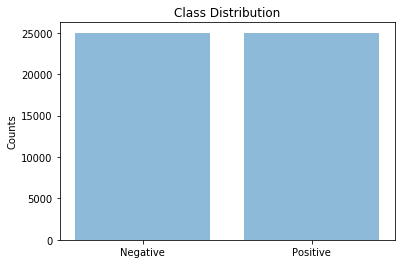

In [0]:
#to plot the bar chart
import matplotlib.pyplot as plt

print ('Class Distribution')

sentiments = ('Negative', 'Positive')
y_pos = np.arange(len(sentiments))
counts = [data_frame.sentiment.value_counts()[0], data_frame.sentiment.value_counts()[1]] 


plt.bar(y_pos, counts, align='center', alpha=0.5) 
plt.xticks(y_pos, sentiments) 
plt.ylabel('Counts')
plt.title('Class Distribution')

plt.show()

In [0]:
#Lets prepare the dataset for Conv Network without using imdb API from Keras
x_train_manual = data_frame.loc[:24999, 'review'].values
y_train_manual = data_frame.loc[:24999, 'sentiment'].values
x_test_manual = data_frame.loc[25000:, 'review'].values
y_test_manual = data_frame.loc[25000:, 'sentiment'].values

In [0]:
#Reconfirm class distribution in train and test sets after split
print ('Distribution in train set ', np.unique(y_train_manual, return_counts= True))
print ('Distribution in test set ', np.unique(y_test_manual, return_counts= True))

Distribution in train set  (array([0, 1]), array([12500, 12500]))
Distribution in test set  (array([0, 1]), array([12500, 12500]))


## Dataset Formating

In this step we are going to convert our text sequence data into number sequences

1. Initalize Tokenizer Object with top_words (as explained above to use only most frequent words (top_words) and make the rest zero) and fit on our training data
2. Convert the text sequences to number sequences by function texts_to_sequences and pass the text data
3. Pad the sequences that are less than the maxlen (max_words) by padding them

In [0]:
tok_train = Tokenizer(num_words=top_words)
tok_train.fit_on_texts(x_train_manual)

x_train_manual = tok_train.texts_to_sequences(x_train_manual)
x_test_manual = tok_train.texts_to_sequences(x_test_manual)

x_train_pad = sequence.pad_sequences(x_train_manual,maxlen=max_words)
x_test_pad = sequence.pad_sequences(x_test_manual,maxlen=max_words)

## Model Building

In [0]:
#import conv and max_pool layer for the CNN model
from keras.layers import Conv1D, MaxPool1D

#Now We will build the Convolutional Model
print ('Building the CNN model')
model_conv = Sequential()
model_conv.add(Embedding(top_words, EMBEDDING_DIM, input_length=max_words))
model_conv.add(Conv1D(filters=32, kernel_size=8, activation='relu'))
model_conv.add(MaxPool1D(pool_size=2)) #pooling layer to reduce dimension
model_conv.add(Flatten()) #flatten the output from pool before passing to dense layer
model_conv.add(Dense(36, activation='relu'))
model_conv.add(Dense(1, activation='sigmoid'))
model_conv.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print ('CNN model build successfully')


W0705 12:01:12.219458 139853253687168 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.



Building the CNN model
CNN model build successfully


## Model Summary

In [0]:
print(model_conv.summary())



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 500, 100)          500000    
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 493, 32)           25632     
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 246, 32)           0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 7872)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 36)                283428    
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 37        
Total params: 809,097
Trainable params: 809,097
Non-trainable params: 0
_________________________________________________________________
None

## Model Training

In [0]:
print ('Start Model Training')
model_conv.fit(x_train_pad, y_train_manual, validation_split=0.3, epochs=10, batch_size=128)
print ('Model Training finished')

Start Model Training
Train on 17500 samples, validate on 7500 samples
Epoch 1/10
17500/17500 [==============================] - 58s 3ms/step - loss: 0.4743 - acc: 0.7766 - val_loss: 0.8672 - val_acc: 0.7063
Epoch 2/10
17500/17500 [==============================] - 58s 3ms/step - loss: 0.3034 - acc: 0.9084 - val_loss: 1.0008 - val_acc: 0.6851
Epoch 3/10
17500/17500 [==============================] - 58s 3ms/step - loss: 0.2419 - acc: 0.9379 - val_loss: 0.9103 - val_acc: 0.7919
Epoch 4/10
17500/17500 [==============================] - 58s 3ms/step - loss: 0.1954 - acc: 0.9594 - val_loss: 1.0943 - val_acc: 0.7759
Epoch 5/10
17500/17500 [==============================] - 58s 3ms/step - loss: 0.1629 - acc: 0.9746 - val_loss: 1.1150 - val_acc: 0.8005
Epoch 6/10
17500/17500 [==============================] - 58s 3ms/step - loss: 0.1410 - acc: 0.9819 - val_loss: 1.3341 - val_acc: 0.7672
Epoch 7/10
17500/17500 [==============================] - 58s 3ms/step - loss: 0.1253 - acc: 0.9857 - val_lo

## Model Evaluation

In [0]:
# Final evaluation of the model
print ('Evaluating the model')
scores = model_conv.evaluate(x_test_pad, y_test_manual, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Evaluating the model
Accuracy: 84.51%


## Testing Samples on the CNN model

Lets test our model on same reviews

The resulting probablities positive reviews tend to be closer to 1 as it is the positive class 

In [0]:
sample1 = "awesome, must watch movie will difinetly watch again if I get the chance"
sample2 = "movie was really good, really liked the acting as well"
sample3 = "movie was not that good at most OK but I did like the acting"
sample4 = "movie was so horrible, very bad acting as well how can people watch this crap"
sample5 = "i have not seen a movie worse than this one"

test_sample = [sample1, sample2, sample3, sample4, sample5] #make a list of lists
test_sample_tok =  tok_train.texts_to_sequences(test_sample) #make sequences just as in done earlier steps
test_sample_pad =  sequence.pad_sequences (test_sample_tok, maxlen=max_words) #pad the sequences as done in earlier steps

print (model_conv.predict(test_sample_pad))


[[0.9980488 ]
 [0.9915957 ]
 [0.28260344]
 [0.23432045]
 [0.23432045]]


## Testing Samples on the LSTM model

This is a bit different from the above code because we have to use keras tokenizer as we did not build the tokenizer for the preloaded dataset


In [0]:
sample1 = "awesome, must watch movie will difinetly watch again"
sample2 = "movie was awesome"
sample3 = "movie was not that good at most OK but I did like the acting"
sample4 = "movie was so horrible, very bad acting as well how can people watch this crap"
sample5 = "bad indeed"

test_sample = [sample1, sample2, sample3, sample4, sample5]

#tk = Tokenizer(nb_words=top_words)
#tk.fit_on_texts(test_sample)

sequences = tok_train.texts_to_sequences(test_sample)
padded_sequences = sequence.pad_sequences(sequences, maxlen=max_words)

prediction = model.predict(padded_sequences)
print(prediction)

[[0.9996575 ]
 [0.99932814]
 [0.7962845 ]
 [0.11646644]
 [0.0058602 ]]
